# Hacktiv8-PTP Python For Data Science // S.6 // Pandas Ep. 2

---

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# import df
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

## <b> EDA </b>

In [3]:
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

Detail Feature: <ul>
<li> ST_NUM: Street number </li>
<li> ST_NAME: Street name </li>
<li> OWN_OCCUPIED: Is the residence owner occupied </li>
<li> NUM_BEDROOMS: Number of bedrooms </li>
</ul>

In [4]:
df.shape

(9, 7)

### <b> Missing Values (NaN) </b>

In [16]:
#Standard NaN / NaN that can be detected in Pandas

PID = df.PID
PID_nulldetect = df.PID.isnull()
print("df.PID :", PID)
print("df.PID.isnull() :", PID_nulldetect)

#NaN detection is correct


df.PID : 0    100001000.0
1    100002000.0
2    100003000.0
3    100004000.0
4            NaN
5    100006000.0
6    100007000.0
7    100008000.0
8    100009000.0
Name: PID, dtype: float64
df.PID.isnull() : 0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: PID, dtype: bool


In [18]:
#Non Standard NaN

bed = df.NUM_BEDROOMS
bed_nulldetect = df.NUM_BEDROOMS.isnull()

print("df.NUM_BEDROOMS :", df.NUM_BEDROOMS)
print("df.NUM_BEDROOMS.isnull() :", df.NUM_BEDROOMS.isnull())

# NaN detection is false in row 6-8

df.NUM_BEDROOMS : 0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object
df.NUM_BEDROOMS.isnull() : 0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


In [22]:
# Ways to handle Nonstandard NaN

missing_values = ["n/a","na","--"]
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)

bed = df.NUM_BEDROOMS
bed_nulldetect = df.NUM_BEDROOMS.isnull()

print("df.NUM_BEDROOMS :", df.NUM_BEDROOMS)
print("df.NUM_BEDROOMS.isnull() :", df.NUM_BEDROOMS.isnull())

#NaN detection is correct


df.NUM_BEDROOMS : 0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64
df.NUM_BEDROOMS.isnull() : 0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool


In [23]:
# More example on Nonstandard NaN
# in OWN_OCCUPIED we have unusual data, suppose to be Y/N but there is integer

cnt = 0
for row in df.OWN_OCCUPIED:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt+=1


In [27]:
df.head

# Now, NaN in fiture OWN_OCCUPIED can be detected correctly

<bound method NDFrame.head of            PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0>

In [26]:
# Sum NaN of each fiture

df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [28]:
# to know wheater there is a NaN or not

df.isnull().values.any()

True

In [29]:
# sum of all NaN

df.isnull().sum().sum()

12

#### <b> Handling Missing Values </b>

In [30]:
# we can handle NaN by replacing another values, such as mean, median, or modus of the feature

df.ST_NUM.fillna(df.ST_NUM.median(), inplace=True)

In [31]:
df.ST_NUM

0    104.0
1    197.0
2    203.0
3    201.0
4    203.0
5    207.0
6    203.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [37]:
# or also we can remove the row contains NaN

df.PID.dropna(inplace=True)

In [38]:
df.PID

0    100001000.0
1    100002000.0
2    100003000.0
3    100004000.0
5    100006000.0
6    100007000.0
7    100008000.0
8    100009000.0
Name: PID, dtype: float64

## <b> Analyzing Obesity in England <b/>

Dataset : __[Download here](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fardhiraka%2FPFDS_sources%2Fmaster%2Fobes.xls&wdOrigin=BROWSELINK)__

In [44]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')


In [45]:
data.sheet_names


['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [67]:
# We only focus on sheet 7.2 and only need rows 5-18

data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [68]:
data_age.head()

Unnamed: 0   Total  Under 16  16-24  25-34  35-44  45-54  55-64  65-74  \
0        NaN     NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    2002/03  1275.0     400.0   65.0  136.0  289.0  216.0   94.0   52.0   
2    2003/04  1711.0     579.0   67.0  174.0  391.0  273.0  151.0   52.0   
3    2004/05  2035.0     547.0  107.0  287.0  487.0  364.0  174.0   36.0   
4    2005/06  2564.0     583.0   96.0  341.0  637.0  554.0  258.0   72.0   

   75 and over  
0          NaN  
1         23.0  
2         24.0  
3         32.0  
4         20.0

First row represent column header. So we have to:
<ul>
<li> rename the first header to Year </li>
<li> get rid of any empty rows

In [72]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [70]:
data_age.dropna(inplace=True)

In [73]:
data_age

Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

    75 and over  
1          23.0  
2          24.0  
3          32.0  
4          20.0  
5          43.0  
6          53.0  
7          63.0  
8          87.0  
9         115.0  
10         94.0  
11         99.0

In [74]:
# set Year as Index

data_age.set_index('Year', inplace=True)

In [75]:
data_age.head()

Total  Under 16  16-24  25-34   35-44  45-54  55-64  65-74  \
Year                                                                   
2002/03  1275.0     400.0   65.0  136.0   289.0  216.0   94.0   52.0   
2003/04  1711.0     579.0   67.0  174.0   391.0  273.0  151.0   52.0   
2004/05  2035.0     547.0  107.0  287.0   487.0  364.0  174.0   36.0   
2005/06  2564.0     583.0   96.0  341.0   637.0  554.0  258.0   72.0   
2006/07  3862.0     656.0  184.0  461.0  1069.0  872.0  459.0  118.0   

         75 and over  
Year                  
2002/03         23.0  
2003/04         24.0  
2004/05         32.0  
2005/06         20.0  
2006/07         43.0

### <b> Visualization <b/>

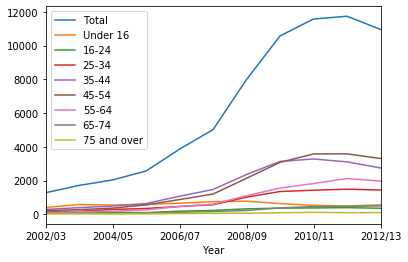

In [76]:
data_age.plot()

We don't need feature Total so we have to remove

In [77]:
data_age_minus_total = data_age.drop('Total', axis=1)

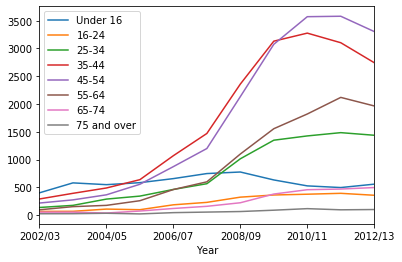

In [78]:
data_age_minus_total.plot()

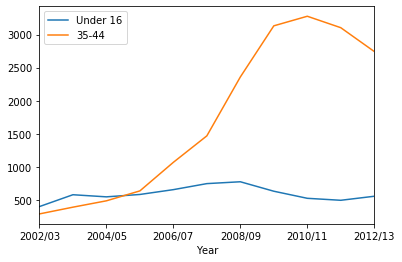

In [79]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

## <b> Time Series </b>

In [86]:
from datetime import datetime

In [85]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [87]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

Make a simple dataframe

In [88]:
dft = pd.DataFrame(date_rng, columns=['date'])
dft['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [89]:
dft.head()

date  data
0 2020-01-01 00:00:00    74
1 2020-01-01 01:00:00    19
2 2020-01-01 02:00:00    79
3 2020-01-01 03:00:00    38
4 2020-01-01 04:00:00    38

In [97]:
# Convert datatime to index

dft['datetime'] = pd.to_datetime(dft['date'])
dft = dft.set_index('datetime')

In [99]:
dft.drop(['date'], axis=1, inplace=True)

In [100]:
dft.head()

data
datetime                 
2020-01-01 00:00:00    74
2020-01-01 01:00:00    19
2020-01-01 02:00:00    79
2020-01-01 03:00:00    38
2020-01-01 04:00:00    38

How if 'time' stamps in our data is actually string vs numeric type?

Let's change date_rng to list of string then change string to time stamps

In [101]:
string_date_rng = [str(x) for x in date_rng]

In [102]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

We can convert string to timestamps from seeing its format, then see the value

In [103]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [104]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

Change string date to timestamps

In [105]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [114]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]

In [108]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [111]:
dft2 = pd.DataFrame(timestamp_date_rng_2, columns =['date'])

In [113]:
dft2

date
0 2020-06-01
1 2020-06-02
2 2020-06-03

In [115]:
dft[dft.index.day == 2]

data
datetime                 
2020-01-02 00:00:00    90
2020-01-02 01:00:00    14
2020-01-02 02:00:00    86
2020-01-02 03:00:00    10
2020-01-02 04:00:00    57
2020-01-02 05:00:00    32
2020-01-02 06:00:00    10
2020-01-02 07:00:00    31
2020-01-02 08:00:00     5
2020-01-02 09:00:00    63
2020-01-02 10:00:00    64
2020-01-02 11:00:00    78
2020-01-02 12:00:00    17
2020-01-02 13:00:00    26
2020-01-02 14:00:00    66
2020-01-02 15:00:00    33
2020-01-02 16:00:00    97
2020-01-02 17:00:00    20
2020-01-02 18:00:00    25
2020-01-02 19:00:00     9
2020-01-02 20:00:00    94
2020-01-02 21:00:00    77
2020-01-02 22:00:00    52
2020-01-02 23:00:00    75

In [116]:
dft['2020-01-02']

data
datetime                 
2020-01-02 00:00:00    90
2020-01-02 01:00:00    14
2020-01-02 02:00:00    86
2020-01-02 03:00:00    10
2020-01-02 04:00:00    57
2020-01-02 05:00:00    32
2020-01-02 06:00:00    10
2020-01-02 07:00:00    31
2020-01-02 08:00:00     5
2020-01-02 09:00:00    63
2020-01-02 10:00:00    64
2020-01-02 11:00:00    78
2020-01-02 12:00:00    17
2020-01-02 13:00:00    26
2020-01-02 14:00:00    66
2020-01-02 15:00:00    33
2020-01-02 16:00:00    97
2020-01-02 17:00:00    20
2020-01-02 18:00:00    25
2020-01-02 19:00:00     9
2020-01-02 20:00:00    94
2020-01-02 21:00:00    77
2020-01-02 22:00:00    52
2020-01-02 23:00:00    75

In [117]:
dft['2020-01-04':'2020-01-05']

data
datetime                 
2020-01-04 00:00:00    40
2020-01-04 01:00:00    17
2020-01-04 02:00:00    65
2020-01-04 03:00:00    29
2020-01-04 04:00:00    66
2020-01-04 05:00:00    10
2020-01-04 06:00:00    41
2020-01-04 07:00:00     1
2020-01-04 08:00:00    71
2020-01-04 09:00:00    58
2020-01-04 10:00:00    35
2020-01-04 11:00:00     8
2020-01-04 12:00:00    21
2020-01-04 13:00:00    74
2020-01-04 14:00:00    97
2020-01-04 15:00:00    27
2020-01-04 16:00:00    68
2020-01-04 17:00:00    35
2020-01-04 18:00:00    95
2020-01-04 19:00:00    74
2020-01-04 20:00:00    34
2020-01-04 21:00:00    29
2020-01-04 22:00:00    12
2020-01-04 23:00:00    98
2020-01-05 00:00:00    42
2020-01-05 01:00:00    33
2020-01-05 02:00:00    61
2020-01-05 03:00:00    37
2020-01-05 04:00:00    58
2020-01-05 05:00:00     7
2020-01-05 06:00:00    64
2020-01-05 07:00:00    40
2020-01-05 08:00:00    35
2020-01-05 09:00:00    53
2020-01-05 10:00:00    24
2020-01-05 11:00:00    13
2020-01-05 12:00:00    18
2020-01-05 13:00:00     2
2020-01-05 14:00:00    74
2020-01-05 15:00:00    69
2020-01-05 16:00:00    62
2020-01-05 17:00:00    32
2020-01-05 18:00:00    80
2020-01-05 19:00:00    87
2020-01-05 20:00:00     8
2020-01-05 21:00:00    27
2020-01-05 22:00:00    64
2020-01-05 23:00:00    49

In [118]:
dft.resample('D').mean()

data
datetime             
2020-01-01  56.333333
2020-01-02  47.125000
2020-01-03  52.625000
2020-01-04  46.041667
2020-01-05  43.291667
2020-01-06  57.083333
2020-01-07  39.166667
2020-01-08  11.000000

In [121]:
# rolling sum in 3 period

dft['rolling_sum'] = dft.rolling(3).sum() 

In [120]:
dft.head()

data  rolling_sum
datetime                              
2020-01-01 00:00:00    74          NaN
2020-01-01 01:00:00    19          NaN
2020-01-01 02:00:00    79        172.0
2020-01-01 03:00:00    38        136.0
2020-01-01 04:00:00    38        155.0

In [122]:
dft['rolling_sum_backfilled'] = dft['rolling_sum'].fillna(method='backfill')

In [124]:
dft.head()

data  rolling_sum  rolling_sum_backfilled
datetime                                                      
2020-01-01 00:00:00    74          NaN                   172.0
2020-01-01 01:00:00    19          NaN                   172.0
2020-01-01 02:00:00    79        172.0                   172.0
2020-01-01 03:00:00    38        136.0                   136.0
2020-01-01 04:00:00    38        155.0                   155.0

## <b> Time Series on Dataset </b>

In [125]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [126]:
opsd_daily.head()

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN

In [127]:
opsd_daily.tail()

Date  Consumption     Wind   Solar  Wind+Solar
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

In [128]:
opsd_daily.set_index('Date', inplace=True)

In [129]:
opsd_daily.head()

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN

In [131]:
# The other way to set index
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', 
index_col=0, parse_dates=True)

In [132]:
opsd_daily.head()

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN

In [133]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10 00:00:00, dtype: float64

In [134]:
opsd_daily.loc['2014-01-20':'2014-01-22']

Consumption    Wind   Solar  Wind+Solar
Date                                               
2014-01-20     1590.687  78.647   6.371      85.018
2014-01-21     1624.806  15.643   5.835      21.478
2014-01-22     1625.155  60.259  11.992      72.251

In [135]:
opsd_daily.loc['2012-02']

Consumption     Wind   Solar  Wind+Solar
Date                                                
2012-02-01     1511.866  199.607  43.502     243.109
2012-02-02     1563.407   73.469  44.675     118.144
2012-02-03     1563.631   36.352  46.510      82.862
2012-02-04     1372.614   20.551  45.225      65.776
2012-02-05     1279.432   55.522  54.572     110.094
2012-02-06     1574.766   34.896  55.389      90.285
2012-02-07     1615.078  100.312  19.867     120.179
2012-02-08     1613.774   93.763  36.930     130.693
2012-02-09     1591.532  132.219  19.042     151.261
2012-02-10     1581.287   52.122  34.873      86.995
2012-02-11     1377.404   32.375  44.629      77.004
2012-02-12     1264.254   62.659  45.176     107.835
2012-02-13     1561.987   25.984  11.287      37.271
2012-02-14     1550.366  146.495   9.610     156.105
2012-02-15     1476.037  413.367  18.877     432.244
2012-02-16     1504.119  130.247  38.176     168.423
2012-02-17     1438.857  196.515  17.328     213.843
2012-02-18     1236.069  237.889  26.248     264.137
2012-02-19     1107.431  272.655  30.382     303.037
2012-02-20     1401.873  160.315  53.794     214.109
2012-02-21     1434.533  281.909  57.984     339.893
2012-02-22     1453.507  287.635  74.904     362.539
2012-02-23     1427.402  353.510  18.927     372.437
2012-02-24     1373.800  382.777  29.281     412.058
2012-02-25     1133.184  302.102  42.667     344.769
2012-02-26     1086.743   95.234  37.214     132.448
2012-02-27     1436.095   86.956  43.099     130.055
2012-02-28     1408.211  231.923  16.190     248.113
2012-02-29     1434.062   77.024  30.360     107.384

<b> Line Plot

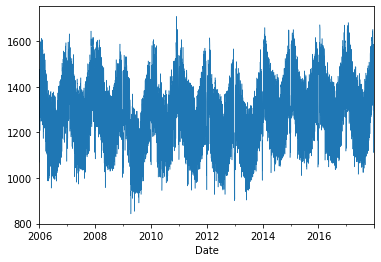

In [139]:
opsd_daily['Consumption'].plot(linewidth=0.5)

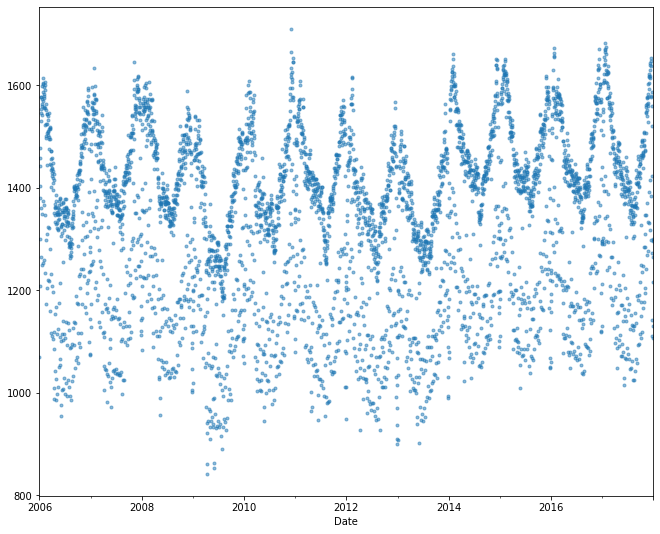

In [141]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

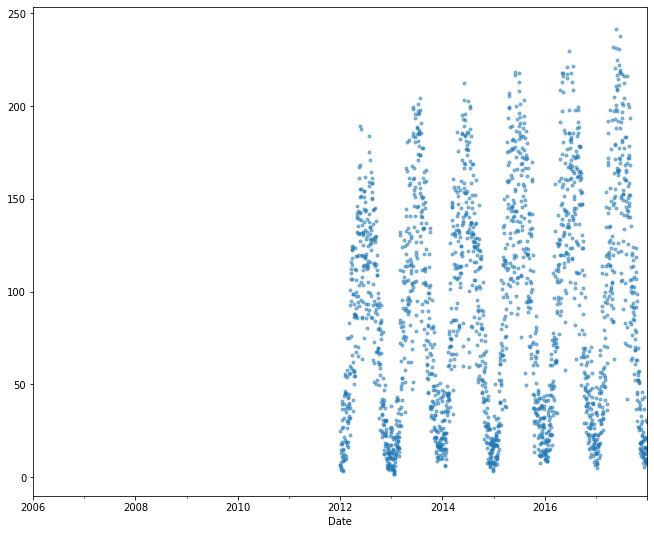

In [142]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

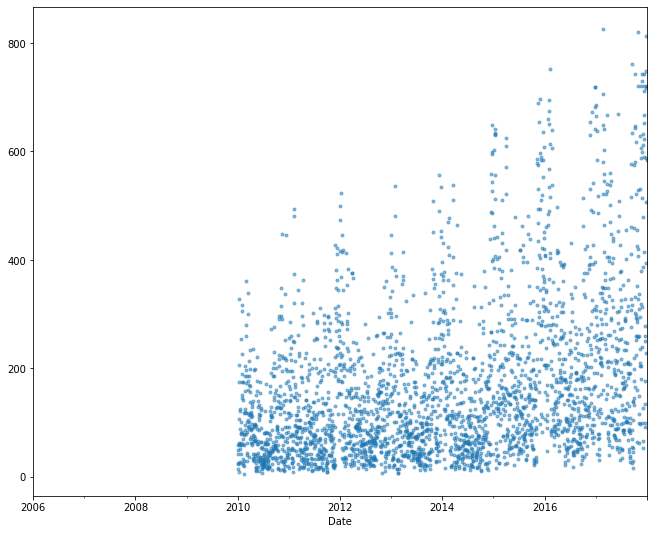

In [144]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

In [ ]:
opsd_daily['Wind+Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

We had interesting pattern:
<ul>
<li> The highest electricity consumption is in winter, probably because electric heater and lighting usage had increased during winter. The lowest electricity consumption is in summer. </li>
<li> The highest solar power production is in summer, when sunlight is most abundant. The lowest is in winter. </li>
<li> The highest wind power production is in winter, probably due to stronger winds and more frequent storms. The lowes is in summer. </li>
<li> There seems to be a strong upward trend in wind power production over the years

Text(0, 0.5, 'Daily Consumption (GWh)')

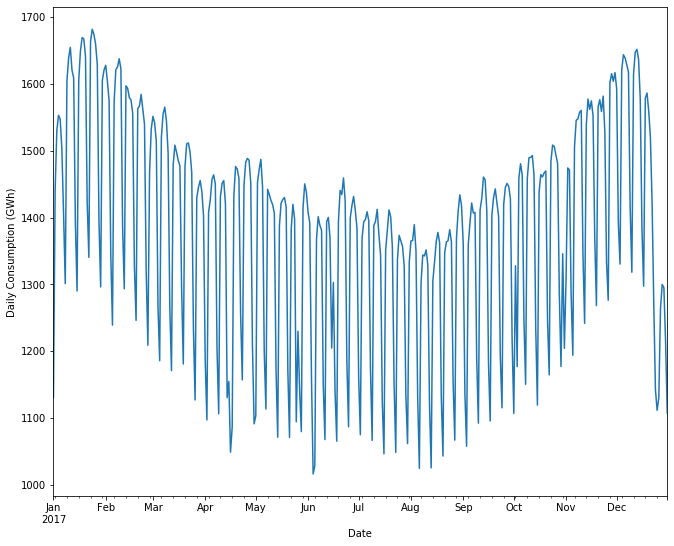

In [145]:
# Time series plot in a year

ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

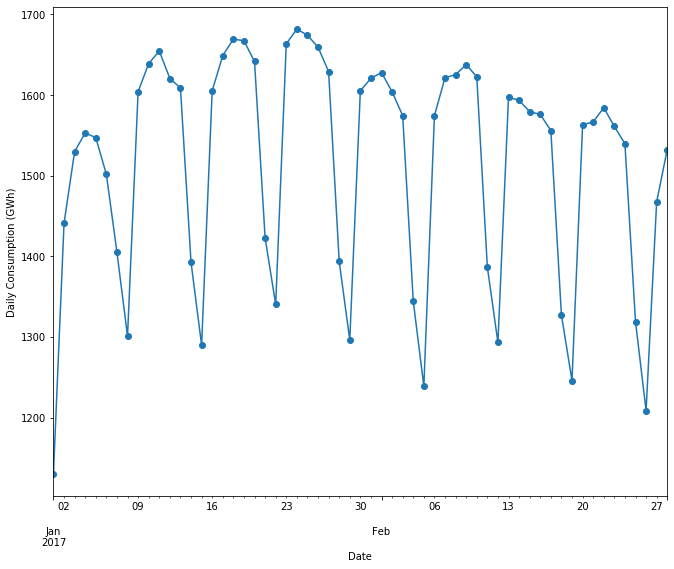

In [147]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

Resample Dataframe

The first row contains mean of all data in time bin 2006-01-01 until 2006-01-14, and so on

In [156]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01  1069.184000   NaN    NaN         NaN
2006-01-08  1381.300143   NaN    NaN         NaN
2006-01-15  1486.730286   NaN    NaN         NaN

In [157]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Plot of Solar in daily and weekly in one period (6 months) and compare it

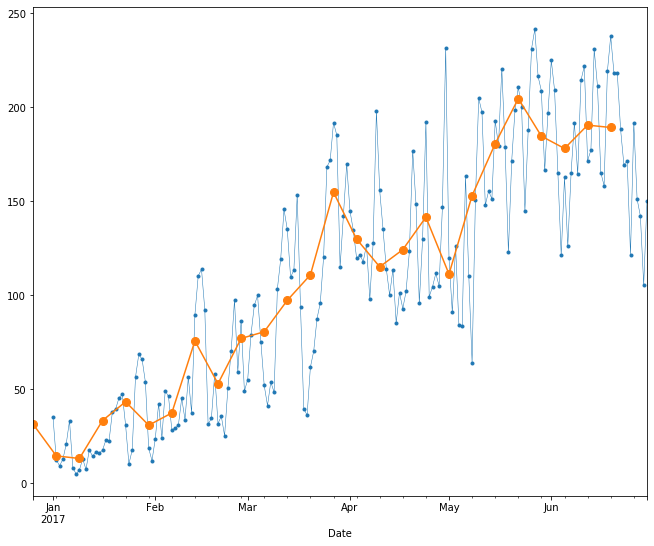

In [158]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

We can see that weekly time series is softer than daily time series because  variability is being averaged in resampling